In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(-0.5, 2.5)
    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    return np.sin(x) - 40*np.exp(-x)

In [20]:
rusl_dbm = {}
vc = {}
for i in tqdm(range(50, 275, 50)):
    rusl_dbm[i] = sturm_liouville_halfline(potential, i, 250, alpha=np.pi/8, dbm=(lambda x: x<=150))

  0%|          | 0/5 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")
100%|██████████| 5/5 [03:18<00:00, 39.60s/it]


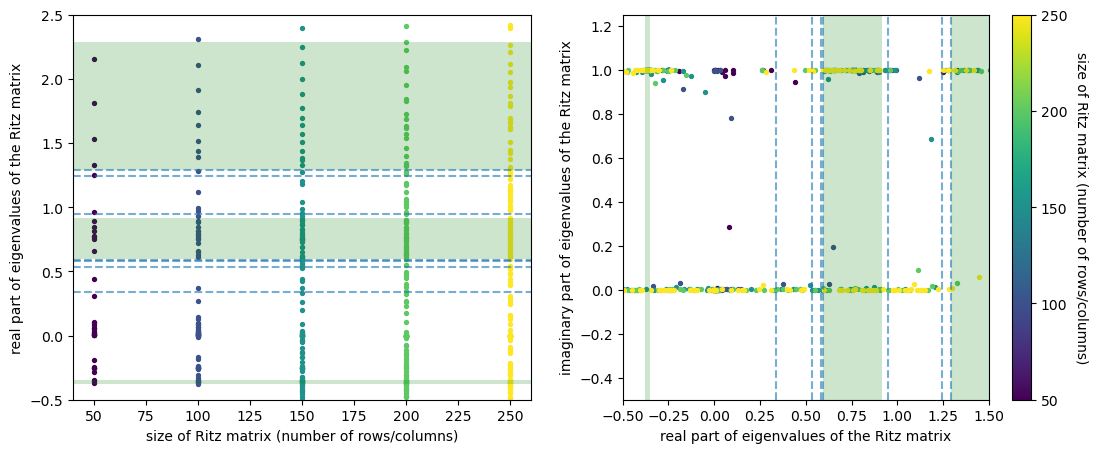

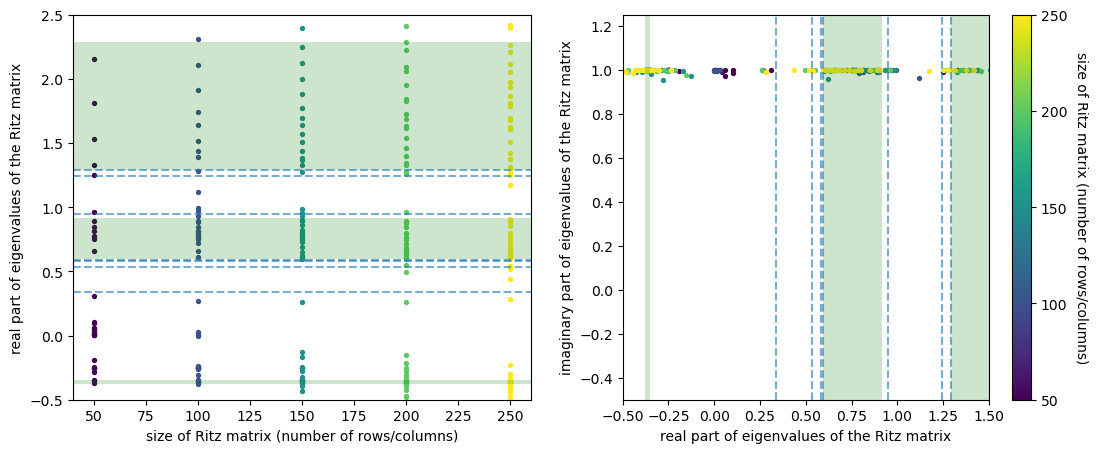

In [32]:
plot(rusl_dbm)
plot(rusl_dbm, dbm=0.95)

In [6]:
vecs_vals = sturm_liouville_halfline(potential, 200, 250, alpha=np.pi/8, returns='vectors', dbm=(lambda x: x<=150))

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")


In [15]:
gap = vecs_vals.filter(lambda x: x.real < 0.5 and x.real > -0.25 and x.imag > 0.95)

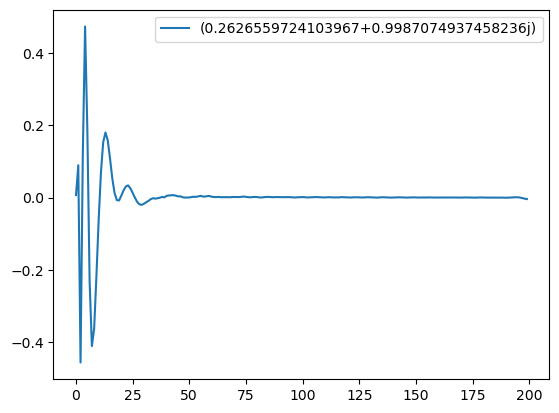

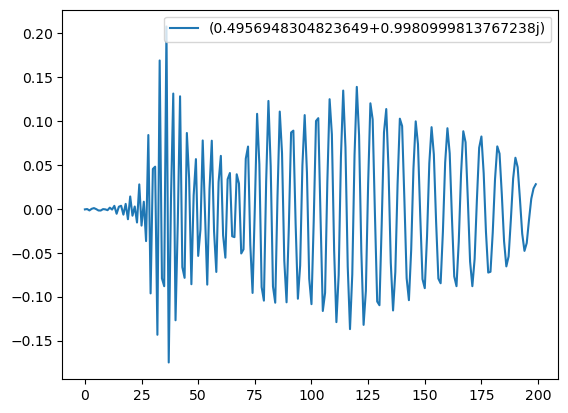

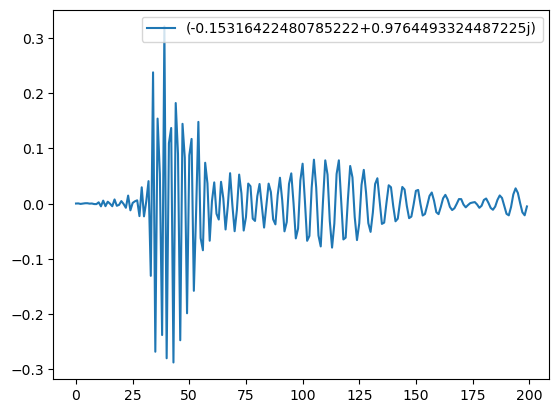

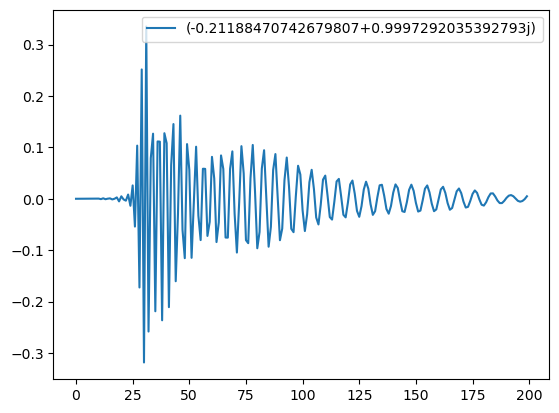

In [16]:
for val, vec in gap.items():
    plt.plot(vec, label=f'{val}')
    plt.legend()
    plt.show()